# ЛР3

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(style="ticks")

In [37]:
data = pd.read_csv('Fleet1.csv')

In [38]:
data.head()

,Parent Airline,Airline,Aircraft Type,Total,Unit Cost,Total Cost (Current)
0,Aegean Airlines,Aegean Airlines,Airbus A319,4.0,90,90
1,Aegean Airlines,Olympic Air,Airbus A319,8.0,90,0
2,Aegean Airlines,Aegean Airlines,Airbus A320,41.0,98,3724
3,Aegean Airlines,Olympic Air,Airbus A320,9.0,98,0
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,115,919


In [39]:
data.shape

(1483, 6)

In [40]:
data.isnull().sum()

Parent Airline          0
Airline                 0
Aircraft Type           0
Total                   5
Unit Cost               0
Total Cost (Current)    0
dtype: int64

In [41]:
data.dtypes

Parent Airline           object
Airline                  object
Aircraft Type            object
Total                   float64
Unit Cost                 int64
Total Cost (Current)      int64
dtype: object

In [42]:
data = data.fillna(0)

In [43]:
data.head()

,Parent Airline,Airline,Aircraft Type,Total,Unit Cost,Total Cost (Current)
0,Aegean Airlines,Aegean Airlines,Airbus A319,4.0,90,90
1,Aegean Airlines,Olympic Air,Airbus A319,8.0,90,0
2,Aegean Airlines,Aegean Airlines,Airbus A320,41.0,98,3724
3,Aegean Airlines,Olympic Air,Airbus A320,9.0,98,0
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,115,919


In [44]:
data.drop(['Parent Airline','Airline','Aircraft Type'], axis = 1, inplace = True)

In [45]:
data.isnull().sum()

Total                   0
Unit Cost               0
Total Cost (Current)    0
dtype: int64

In [46]:
parts = np.split(data, [2,3], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Total  Unit Cost
0    4.0       90.0
1    8.0       90.0
2   41.0       98.0
3    9.0       98.0
4    8.0      115.0 

Выходные данные:

    Total Cost (Current)
0                  90.0
1                   0.0
2                3724.0
3                   0.0
4                 919.0


## Разделение выборки

In [47]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.05)

In [48]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       Total  Unit Cost
924    59.0       98.0
271    26.0       14.0
545    42.0        6.0
595   174.0      295.0
1223    2.0      316.0 

Входные параметры тестовой выборки:

       Total  Unit Cost
136     3.0       74.0
58      2.0       75.0
10     14.0       75.0
1159    4.0       74.0
754    21.0       37.0 

Выходные параметры обучающей выборки:

       Total Cost (Current)
924                 5488.0
271                    0.0
545                    0.0
595                46833.0
1223                   0.0 

Выходные параметры тестовой выборки:

       Total Cost (Current)
136                  222.0
58                     0.0
10                     0.0
1159                   0.0
754                  666.0


In [49]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1408, 2)
(75, 2)
(1408, 1)
(75, 1)


## Модель ближайших соседей для произвольного гиперпараметра K

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [52]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_10NN[:5], '\n ...')

Пример предсказанных значений:

 [[ 74. ]
 [ 14.8]
 [ 97.3]
 [ 29.6]
 [477.8]] 
 ...


## Оценка качества регрессии (Метрики качества)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score , accuracy_score

In [54]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 615.48
Средняя абсолютная ошибка для 5 ближайших соседей: 564.0559999999999
Средняя абсолютная ошибка для 10 ближайших соседей: 602.3773333333334


In [55]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 1356342.9266666668
Средняя квадратичная ошибка для 5 ближайших соседей: 1028132.5797333334
Средняя квадратичная ошибка для 10 ближайших соседей: 1449675.8236


In [56]:
# Оценка коэффициента детерминации
print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN))

Коэффициент детерминации для 2 ближайших соседей: 0.6245087217231137
Коэффициент детерминации для 5 ближайших соседей: 0.715370789339429
Коэффициент детерминации для 10 ближайших соседей: 0.5986703529110979


In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Подбор гиперпараметров

In [58]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [59]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor()

Лучшее число ближайших соседей:

 {'n_neighbors': 5}

Лучшее значение средней квадратичной ошибки:

 -5252345.49148531


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



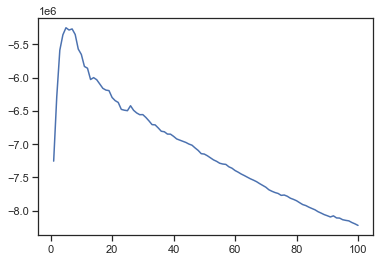

In [60]:
print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

Лучшая модель:

 KNeighborsRegressor(n_neighbors=6)

Лучшее число ближайших соседей:

 {'n_neighbors': 6}

Лучшее значение коэффициента детерминации:

 0.5577088458809737

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



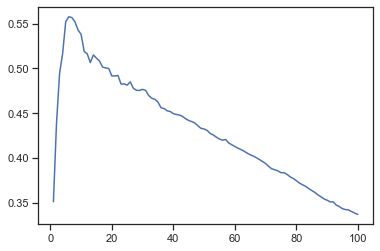

In [61]:

gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кроссвалидация

In [62]:
from sklearn.model_selection import cross_val_score
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [0.73486476 0.41379387 0.49494216 0.68137631 0.51767932] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: 0.5601646609553143 

- 5 ближайших соседей: 0.5869532532516132 

- 10 ближайших соседей: 0.5685312830265634 

- 50 ближайших соседей: 0.42947492199939996 

- 100 ближайших соседей: 0.32973971996252527 

